# <center> **Probability Plots** </center>
## <font size=4> **Inteligencia Artificial 2025** </font> <font color=gray size=4> -- Alan Reyes-Figueroa </font>

In [1]:
import numpy as np
import scipy.stats as sps
from scipy.signal import correlate

import statsmodels.api as st
import matplotlib.pyplot as plt
import seaborn as sns
#import pylab as pl

from warnings import filterwarnings
filterwarnings('ignore')

# Probability-Plots

In [2]:
data = np.random.normal(loc=20, scale=2.5, size=500)

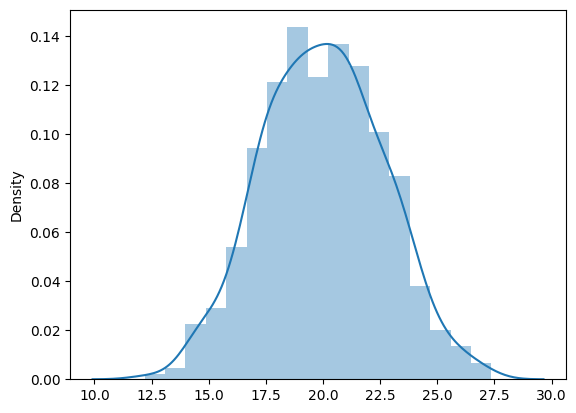

In [3]:
plt.figure()
sns.distplot(data)
plt.show()

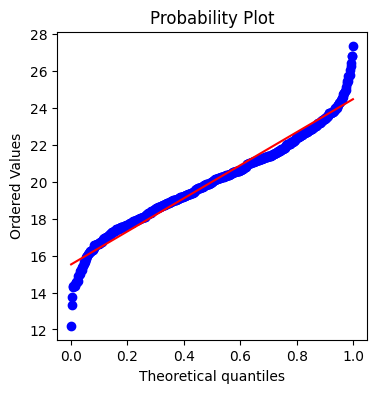

In [4]:
plt.figure(figsize=(4,4))
sps.probplot(data, dist='uniform', plot=plt)
plt.show()

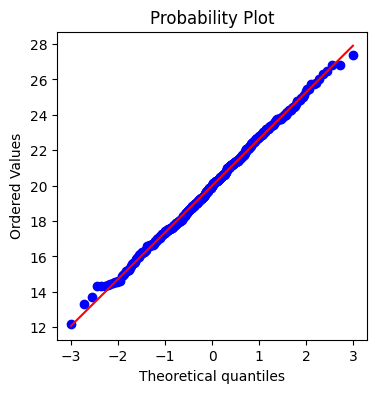

In [5]:
plt.figure(figsize=(4,4))
sps.probplot(data, dist='norm', plot=plt)
plt.show()

In [6]:
data = np.random.normal(loc=20, scale=3.5, size=500)

In [7]:
mean = data.mean()
std = data.std()

print('mean =', mean)
print('std  =', std)

mean = 20.16204149093456
std  = 3.581820434697718


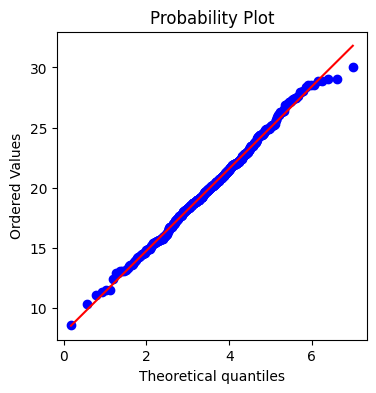

In [8]:
plt.figure(figsize=(4,4))
sps.probplot(data, sparams=(mean, std), dist='t', plot=plt)
plt.show()

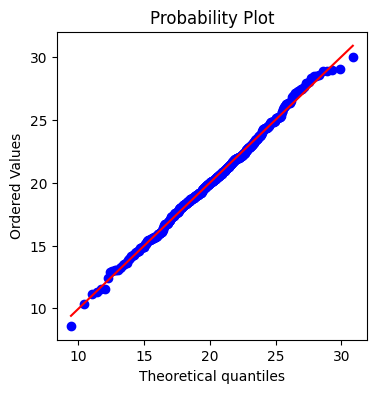

In [9]:
plt.figure(figsize=(4,4))
sps.probplot(data, sparams=(mean, std), dist='norm', plot=plt)
plt.show()

In [10]:
#data2 = np.random.beta(1., 2., size=5000)
data2 = np.random.beta(2., 1., size=100)

In [11]:
data3 = np.random.beta(1., 2., size=100)

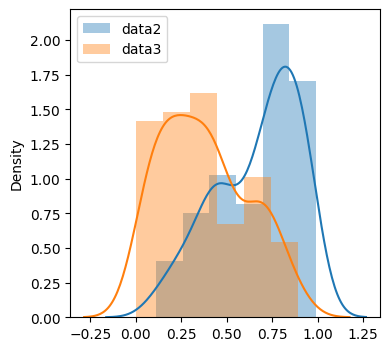

In [12]:
plt.figure(figsize=(4,4))
sns.distplot(data2, kde=True, label='data2')
sns.distplot(data3, kde=True, label='data3')
plt.legend()
plt.show()

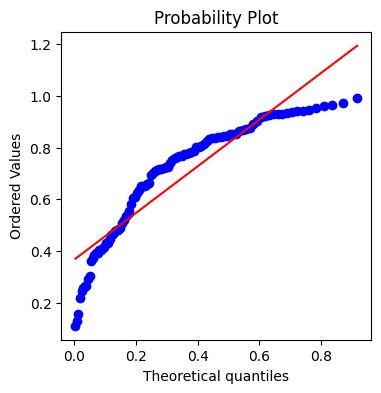

In [13]:
plt.figure(figsize=(4,4))
sps.probplot(data2, sparams=(1, 2), dist='beta', plot=plt)
plt.show()

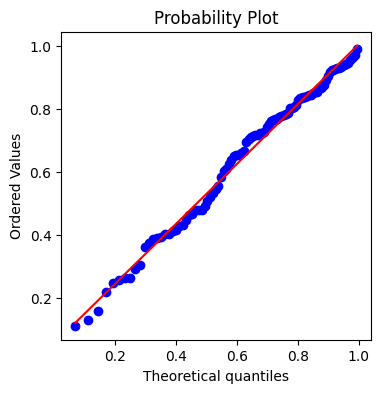

In [14]:
plt.figure(figsize=(4,4))
sps.probplot(data2, sparams=(1.9, 1.05), dist='beta', plot=plt)
plt.show()

In [15]:
data4 = np.random.beta(1.9, 1.05, 100)

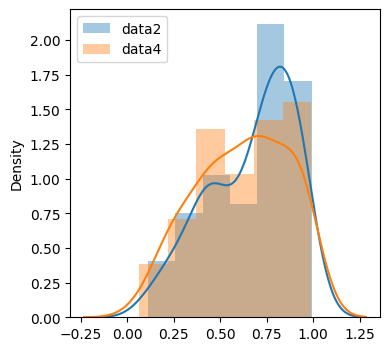

In [16]:
plt.figure(figsize=(4,4))
sns.distplot(data2, kde=True, label='data2')
sns.distplot(data4, kde=True, label='data4')
plt.legend()
plt.show()

## Contraste de dos muestra (Kolmogorov-Smirnov)

In [17]:
sps.kstest(data2, data3)

KstestResult(statistic=np.float64(0.46), pvalue=np.float64(6.422179651064002e-10), statistic_location=np.float64(0.4433680282746911), statistic_sign=np.int8(-1))

In [18]:
data4 = np.random.beta(1.9, 1.05, size=100)

In [19]:
sps.kstest(data2, data4)

KstestResult(statistic=np.float64(0.15), pvalue=np.float64(0.21117008625127576), statistic_location=np.float64(0.714238327402515), statistic_sign=np.int8(-1))

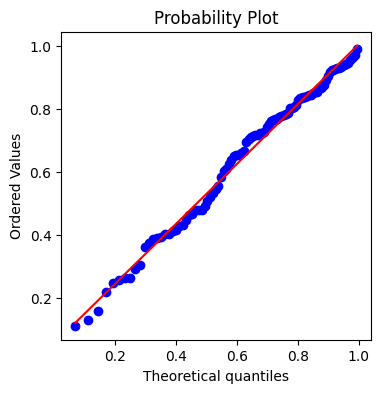

In [20]:
plt.figure(figsize=(4,4))
sps.probplot(data2, sparams=(1.9, 1.05), dist='beta', plot=plt)
plt.show()

## Fitting a distribution

In [21]:
dist = sps.beta

In [22]:
# Encontrar los parámetros óptimos de la distribución
params = dist.fit(data2)

In [23]:
print(params)

(np.float64(1.5698978835028647), np.float64(0.8304421904396524), np.float64(0.02360396552074407), np.float64(0.9675291194453759))


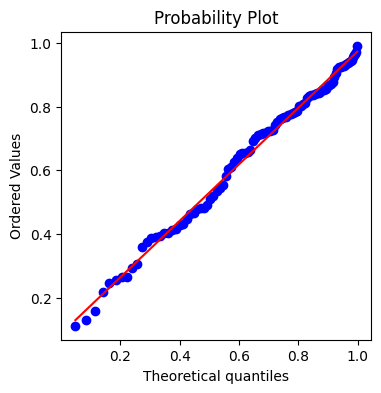

In [24]:
plt.figure(figsize=(4,4))
sps.probplot(data2, sparams=(params[0], params[1]), dist='beta', plot=plt)
plt.show()

In [25]:
data_modelo = np.random.beta(params[0], params[1], 200)

In [26]:
sps.kstest(data2, data_modelo)

KstestResult(statistic=np.float64(0.08), pvalue=np.float64(0.7783973524742297), statistic_location=np.float64(0.8704291674383645), statistic_sign=np.int8(1))

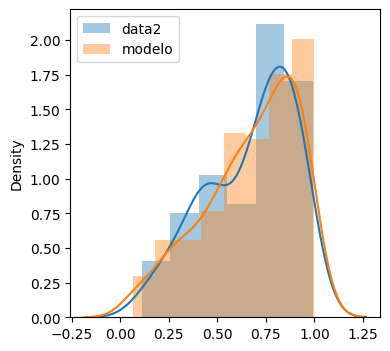

In [27]:
plt.figure(figsize=(4,4))
sns.distplot(data2, kde=True, label='data2')
sns.distplot(data_modelo, kde=True, label='modelo')
plt.legend()
plt.show()

# Set de Gráficas

In [28]:
data1 = np.random.beta(1.0, 1.5, size=5000)
data2 = np.random.beta(1.5, 1.0, size=5000)

In [29]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

In [30]:
def compare_dist(d1, d2, size=1000):
    data1 = d1.rvs(size=size)
    data2 = d2.rvs(size=size)
    
    x1, y1 = ecdf(data1)
    x1 = np.insert(x1, 0, x1[0])
    y1 = np.insert(y1, 0, 0.)
    x2, y2 = ecdf(data2)
    x2 = np.insert(x2, 0, x2[0])
    y2 = np.insert(y2, 0, 0.)
    
    minx = min(x1.min(), x2.min())
   
    plt.figure(figsize=(10, 10))
    
    # Density Functions DF
    plt.subplot(2,2,1)
    sns.kdeplot(data1, bw_method=0.5, label='dist1')
    sns.kdeplot(data2, bw_method=0.5, label='dist2')
    plt.title('Density Plot')
    
    # Distribution Functions CDF
    plt.subplot(2,2,2)
    plt.plot(x1, y1, drawstyle='steps-post')
    plt.plot(x2, y2, drawstyle='steps-post')
    plt.grid(True)
    plt.title('CDF Plot')
    
    # QQ-plot
    plt.subplot(2,2,3)
    qqs = np.linspace(0., 1., 1001)[:-1]
    qq1 = np.quantile(data1, qqs)
    qq2 = np.quantile(data2, qqs)
    minq = min(qq1.min(), qq2.min())
    maxq = max(qq1.max(), qq2.max())
    plt.plot([minq,maxq], [minq,maxq], 'r-', lw=2)
    plt.plot(qq1, qq2, 'b.', drawstyle='steps-post')
    plt.grid(True)
    plt.title('QQ-Plot')
    plt.xlabel('Dist1 Quantiles')
    plt.ylabel('Dist2 Quantiles') 
    
    # PP-plot
    plt.subplot(2,2,4)
    sps.probplot(data2, dist=d1, plot=plt)
    #minp = min(y1.min(), y2.min())
    #maxp = max(y1.max(), y2.max())
    #plt.plot([minp,maxp], [minp,maxp], 'r-', lw=2)
    #plt.plot(y1, y2, 'b.', drawstyle='steps-post')
    plt.grid(True)
    plt.title('PP-Plot')
    plt.xlabel('Dist1 Probabilities')
    plt.ylabel('Dist2 Probabilities') 

    plt.show()
    return data1, data2

In [31]:
#d1 = sps.norm(loc=0., scale=3.)
#d2 = sps.norm(loc=10., scale=5.)

In [32]:
d1 = sps.norm(loc=5., scale=6.)
d2 = sps.norm(loc=6., scale=5.)

In [33]:
#d1 = sps.beta(2., 1.)
#d2 = sps.beta(1., 2.)

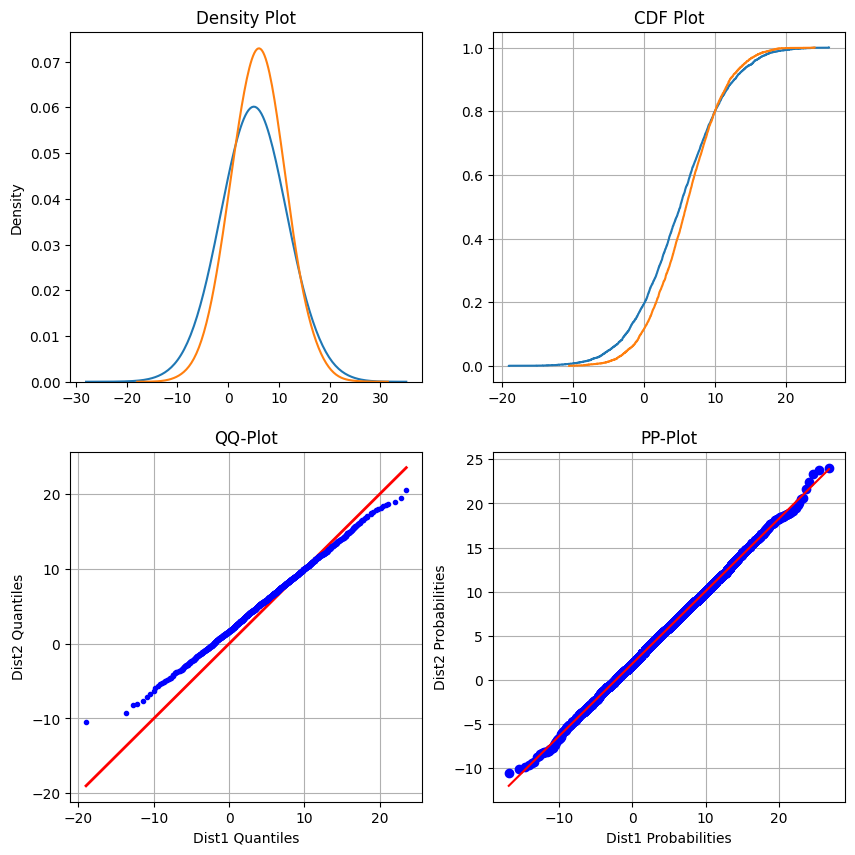

In [34]:
data1, data2 = compare_dist(d1, d2, size=5000)

In [35]:
sps.ks_2samp(data1, data2, alternative='two-sided')

KstestResult(statistic=np.float64(0.0932), pvalue=np.float64(2.5917430120055237e-19), statistic_location=np.float64(3.6230980147222733), statistic_sign=np.int8(1))

In [36]:
sps.kstest(data1, data2)

KstestResult(statistic=np.float64(0.0932), pvalue=np.float64(2.5917430120055237e-19), statistic_location=np.float64(3.6230980147222733), statistic_sign=np.int8(1))